In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
data=pd.read_csv('../Dataset/zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:

data.shape
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
data=data.drop(columns=['url','address','name','phone','reviews_list','menu_item','dish_liked','cuisines','listed_in(city)','rest_type'])
data.head()

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1/5,775,Banashankari,800,Buffet
1,Yes,No,4.1/5,787,Banashankari,800,Buffet
2,Yes,No,3.8/5,918,Banashankari,800,Buffet
3,No,No,3.7/5,88,Banashankari,300,Buffet
4,No,No,3.8/5,166,Basavanagudi,600,Buffet


In [8]:

cat_col=['online_order'	,'book_table','location','listed_in(type)']
num_col=['rate','votes','approx_cost(for two people)']

In [9]:
cat_col_safe=['online_order','book_table','listed_in(type)']
encoded_data=pd.get_dummies(data[cat_col_safe],drop_first=True).astype('int64')
encoded_data

,online_order_Yes,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
51712,0,0,0,0,0,0,0,1
51713,0,0,0,0,0,0,0,1
51714,0,0,0,0,0,0,0,1
51715,0,1,0,0,0,0,0,1


In [10]:
data['location_freq'] = data['location'].map(
    data['location'].value_counts()
)

data=pd.concat((data[num_col],encoded_data,data[['location_freq']]),axis=1)
data.head()

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,location_freq
0,4.1/5,775,800,1,1,0,0,0,0,0,0,906.0
1,4.1/5,787,800,1,0,0,0,0,0,0,0,906.0
2,3.8/5,918,800,1,0,0,0,0,0,0,0,906.0
3,3.7/5,88,300,0,0,0,0,0,0,0,0,906.0
4,3.8/5,166,600,0,0,0,0,0,0,0,0,684.0


In [11]:
data.dtypes


rate                                   object
votes                                   int64
approx_cost(for two people)            object
online_order_Yes                        int64
book_table_Yes                          int64
listed_in(type)_Cafes                   int64
listed_in(type)_Delivery                int64
listed_in(type)_Desserts                int64
listed_in(type)_Dine-out                int64
listed_in(type)_Drinks & nightlife      int64
listed_in(type)_Pubs and bars           int64
location_freq                         float64
dtype: object

In [12]:
data['rate'].value_counts()


rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [13]:
data['rate']=data['rate'].astype(str)
data=data[~data['rate'].isin(['NEW', '-', 'nan'])]
data['rate']=data['rate'].str.split('/').str[0].astype(float)

In [14]:
data['approx_cost(for two people)'].value_counts()


approx_cost(for two people)
400      5290
300      5270
500      4109
600      3210
200      3173
         ... 
120         2
70          1
5,000       1
3,700       1
80          1
Name: count, Length: 63, dtype: int64

In [15]:
data['approx_cost(for two people)'] = (
    data['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '')
    .astype(float)
)

In [16]:
data.describe()


,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,location_freq
count,41665.000000,41665.000000,41418.000000,41665.000000,41665.000000,41665.000000,41665.000000,41665.000000,41665.000000,41665.000000,41665.000000,41665.000000
mean,3.700449,351.653018,603.268048,0.652970,0.151302,0.036625,0.495596,0.065571,0.340982,0.025321,0.015385,1634.520029
std,0.440513,881.800960,464.327857,0.476031,0.358347,0.187843,0.499987,0.247533,0.474045,0.157100,0.123078,1336.417461
min,1.800000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.400000,21.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,675.000000
50%,3.700000,73.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1218.000000
75%,4.000000,276.000000,700.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2144.000000
max,4.900000,16832.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5124.000000


In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].mean(), inplace=True)
standard=StandardScaler()
std_data=standard.fit_transform(data)

C:\Users\HP\AppData\Local\Temp\ipykernel_9104\410444318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].mean(), inplace=True)


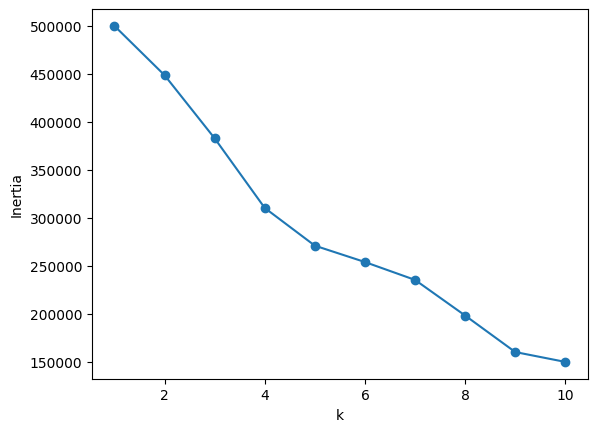

In [19]:
import matplotlib.pyplot as plt
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(std_data)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()


In [20]:
model=KMeans(n_clusters=5,random_state=42)
model.fit(std_data)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [21]:
y_pred=model.predict(std_data)
data['cluster'] = y_pred
data.groupby('cluster').mean()

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,location_freq
cluster,,,,,,,,,,,,
0,3.613628,157.663405,443.636562,0.782709,0.007188,0.058853,0.937503,0.000000,0.000000,0.0,0.000000,1769.794938
1,3.773990,175.750184,407.641008,0.532329,0.046657,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1463.175974
2,3.569058,163.166385,493.111824,0.535019,0.005667,0.000000,0.000000,0.000000,0.986128,0.0,0.000085,1595.311538
3,4.157666,1296.792640,1289.962288,0.583292,0.881817,0.057517,0.309630,0.001658,0.422510,0.0,0.106083,1406.206531
4,4.017062,1196.452133,1446.713441,0.220853,0.612322,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1252.884360
